# Strategy Analysis with **Pandas TA** and AI/ML
* This is a **Work in Progress** and subject to change!
* Contributions are welcome and accepted!
* Examples below are for **educational purposes only**.
* **NOTE:** The **watchlist** module is independent of Pandas TA. To easily use it, copy it from your local pandas_ta installation directory into your project directory.

### Required Packages
##### Uncomment the packages you need to install or are missing

In [1]:
#!pip install numpy
#!pip install pandas
#!pip install mplfinance
#!pip install pandas-datareader
#!pip install requests_cache
#!pip install tqdm
#!pip install alphaVantage-api # Required for Watchlist

In [3]:
!pip uninstall -y mplfinance
!pip install --no-cache-dir mplfinance
!pip install graphviz 

Found existing installation: mplfinance 0.12.9b7
Uninstalling mplfinance-0.12.9b7:
  Successfully uninstalled mplfinance-0.12.9b7
     |████████████████████████████████| 73 kB 6.9 MB/s eta 0:00:01


In [1]:
!conda install -c conda-forge -y ta-lib

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.12.0
  latest version: 23.1.0

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/steven/anaconda3

  added / updated specs:
    - ta-lib


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.14.0               |   py39hf3d152e_0        1011 KB  conda-forge
    libta-lib-0.4.0            |       h516909a_0         503 KB  conda-forge
    python_abi-3.9             |           2_cp39           4 KB  conda-forge
    ta-lib-0.4.19              |   py39h16ac069_2         420 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         1.9 MB

The following NEW packages will be INSTALLED:

  libta-lib          conda-forge/linux-64::libta

In [16]:
!pip install td-ameritrade-python-api

     |████████████████████████████████| 54 kB 411 kB/s eta 0:00:011
  Using cached requests_oauthlib-1.3.1-py2.py3-none-any.whl (23 kB)
  Using cached oauthlib-3.2.2-py3-none-any.whl (151 kB)


In [56]:
%pylab inline
import datetime as dt
import random as rnd
from sys import float_info as sflt

from tqdm import tqdm
import graphviz

import numpy as np
import pandas as pd
# pd.set_option("max_rows", 5)
pd.options.display.max_rows = 20
# pd.set_option("max_columns", 20)
pd.options.display.max_columns = 5

import mplfinance as mpf
import pandas_ta as ta
from sklearn.manifold import TSNE

from tqdm.notebook import trange, tqdm
import yahoo_fin.stock_info as si
from datetime import datetime, timedelta, timezone

import matplotlib.pyplot as plt
from watchlist import colors, Watchlist # Is this failing? If so, copy it locally. See above.

from utils import *
from myInds import *
from ind_trainer import *
import xgboost as xgb

print(f"Numpy v{np.__version__}")
print(f"Pandas v{pd.__version__}")
print(f"mplfinance v{mpf.__version__}")
print(f"\nPandas TA v{ta.version}\nTo install the Latest Version:\n$ pip install -U git+https://github.com/twopirllc/pandas-ta\n")
%matplotlib inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib
Numpy v1.21.5
Pandas v1.4.2
mplfinance v0.12.9b7

Pandas TA v0.3.14b0
To install the Latest Version:
$ pip install -U git+https://github.com/twopirllc/pandas-ta



/home/steven/anaconda3/lib/python3.9/site-packages/IPython/core/magics/pylab.py:162: UserWarning:

pylab import has clobbered these variables: ['hot', 'flag', 'uniform', 'random', 'datetime', 'randint']
`%matplotlib` prevents importing * from pylab and numpy



### MISC Function(s)

In [57]:
tf = "D"
#benchmark
#bm = ["SPY", "QQQ", "AAPL", "TSLA", "BTC-USD"]

#earning bet
core = ["TSLA", "GOOG", "ENPH", "NVDA","MRNA","AAPL"]
energy = ["GUSH", "CF", "EQT","OXY","SEDG"]
semi = ["QCOM","LRCX","ASML","AMD","SOXL","TSM"]
index = ["SPY","QQQ","TQQQ", "SQQQ","IWM"]
fin = ["BLK","BX","TLT"]
hot = ["SHOP","FSLY","U","ZM"]
btc = ["COIN","BTC-USD","MSTR","ETH-USD"]
software = ["ADBE","MSFT","PLTR"]
base = ["COST","HD","KO","MCD","PFE","UNH"]
bio = ["XBI"]
cloud = ["OKTA","DDOG","DASH","NOW"]
random = ["NKX","DOG", "GTLB","RBLX","FSLY", "SNAP", "ROKU"]
tradition = ["AAL"]
tickers = core + semi + index + energy + fin + hot + btc + software + bio + base + cloud + random + tradition
# ["GOOG", "TSLA","GUSH","EQT","COIN","ENPH","AAPL","SHOP","NVDA","BX","BLK","LRCX","TSM","TLT", "TAN"]
watch = retrieve_data(tickers, tf=tf)


[!] Loading All: TSLA, GOOG, ENPH, NVDA, MRNA, AAPL, QCOM, LRCX, ASML, AMD, SOXL, TSM, SPY, QQQ, TQQQ, SQQQ, IWM, GUSH, CF, EQT, OXY, SEDG, BLK, BX, TLT, SHOP, FSLY, U, ZM, COIN, BTC-USD, MSTR, ETH-USD, ADBE, MSFT, PLTR, XBI, COST, HD, KO, MCD, PFE, UNH, OKTA, DDOG, DASH, NOW, NKX, DOG, GTLB, RBLX, FSLY, SNAP, ROKU, AAL
/home/steven/av_data/data/TSLA_D.csv
[i] Loaded TSLA[D]: TSLA_D.csv
[i] Runtime: 134.6257 ms (0.1346 s)
/home/steven/av_data/data/GOOG_D.csv
[i] Loaded GOOG[D]: GOOG_D.csv
[i] Runtime: 134.2624 ms (0.1343 s)
/home/steven/av_data/data/ENPH_D.csv
[i] Loaded ENPH[D]: ENPH_D.csv
[i] Runtime: 133.2789 ms (0.1333 s)
/home/steven/av_data/data/NVDA_D.csv
[i] Loaded NVDA[D]: NVDA_D.csv
[i] Runtime: 136.5799 ms (0.1366 s)
/home/steven/av_data/data/MRNA_D.csv
[i] Loaded MRNA[D]: MRNA_D.csv
[i] Runtime: 131.5616 ms (0.1316 s)
/home/steven/av_data/data/AAPL_D.csv
[i] Loaded AAPL[D]: AAPL_D.csv
[i] Runtime: 143.6477 ms (0.1436 s)
/home/steven/av_data/data/QCOM_D.csv
[i] Loaded QCOM[D

In [3]:
sgroups = {"sp500":si.tickers_sp500(),
    "dow": si.tickers_dow(),
           "nasq": si.tickers_nasdaq(),
           "other": si.tickers_other()
          }

print(sgroups)

{'sp500': ['A', 'AAL', 'AAP', 'AAPL', 'ABBV', 'ABC', 'ABT', 'ACGL', 'ACN', 'ADBE', 'ADI', 'ADM', 'ADP', 'ADSK', 'AEE', 'AEP', 'AES', 'AFL', 'AIG', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALGN', 'ALK', 'ALL', 'ALLE', 'AMAT', 'AMCR', 'AMD', 'AME', 'AMGN', 'AMP', 'AMT', 'AMZN', 'ANET', 'ANSS', 'AON', 'AOS', 'APA', 'APD', 'APH', 'APTV', 'ARE', 'ATO', 'ATVI', 'AVB', 'AVGO', 'AVY', 'AWK', 'AXP', 'AZO', 'BA', 'BAC', 'BALL', 'BAX', 'BBWI', 'BBY', 'BDX', 'BEN', 'BF-B', 'BG', 'BIIB', 'BIO', 'BK', 'BKNG', 'BKR', 'BLK', 'BMY', 'BR', 'BRK-B', 'BRO', 'BSX', 'BWA', 'BXP', 'C', 'CAG', 'CAH', 'CARR', 'CAT', 'CB', 'CBOE', 'CBRE', 'CCI', 'CCL', 'CDAY', 'CDNS', 'CDW', 'CE', 'CEG', 'CF', 'CFG', 'CHD', 'CHRW', 'CHTR', 'CI', 'CINF', 'CL', 'CLX', 'CMA', 'CMCSA', 'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COO', 'COP', 'COST', 'CPB', 'CPRT', 'CPT', 'CRL', 'CRM', 'CSCO', 'CSGP', 'CSX', 'CTAS', 'CTLT', 'CTRA', 'CTSH', 'CTVA', 'CVS', 'CVX', 'CZR', 'D', 'DAL', 'DD', 'DE', 'DFS', 'DG', 'DGX', 'DHI', 'DHR', 'DIS', 'DISH

In [7]:
str = '15m'
print(str[-1])
print(str[:-1])

m
15


In [30]:
def performance_analsis(ticker, tf = '15m', straSE = 'obv', duration = 10 ):
    ticker = ticker.upper()
    end_date = datetime.now()
    if (tf[-1] == 'd'):
        days = max(50, duration)
    else:
        days = duration
    start_date = end_date - timedelta(days=days)
    pf, entries, exits = process(ticker, startdate = start_date, enddate = end_date, tf = tf, flag='close', straSE = straSE)
    return(pf.stats())

In [31]:
ticker = 'tsla'
straSE = 'obv'
tf = '1d'
days = 15 
# trading_days = days
# ticker = ticker.upper()
# end_date = datetime.now()
# start_date = end_date - timedelta(days=trading_days)
stats = performance_analsis(ticker=ticker, tf=tf, straSE=straSE, duration=days)


[*********************100%***********************]  1 of 1 completed


/home/steven/anaconda3/lib/python3.9/site-packages/vectorbt/generic/stats_builder.py:396: UserWarning: Metric 'sharpe_ratio' requires frequency to be set
  warnings.warn(warning_message)
/home/steven/anaconda3/lib/python3.9/site-packages/vectorbt/generic/stats_builder.py:396: UserWarning: Metric 'calmar_ratio' requires frequency to be set
  warnings.warn(warning_message)
/home/steven/anaconda3/lib/python3.9/site-packages/vectorbt/generic/stats_builder.py:396: UserWarning: Metric 'omega_ratio' requires frequency to be set
  warnings.warn(warning_message)
/home/steven/anaconda3/lib/python3.9/site-packages/vectorbt/generic/stats_builder.py:396: UserWarning: Metric 'sortino_ratio' requires frequency to be set
  warnings.warn(warning_message)


In [32]:
print(stats.get)

<bound method NDFrame.get of Start                         2023-02-06 00:00:00-05:00
End                           2023-03-27 00:00:00-04:00
Period                                               35
Start Value                                       100.0
End Value                                     89.553029
                                        ...            
Avg Losing Trade [%]                          -2.364471
Avg Winning Trade Duration                          2.5
Avg Losing Trade Duration                         1.375
Profit Factor                                  0.407259
Expectancy                                    -1.044697
Length: 24, dtype: object>


In [35]:
def test_process(ticker, tf=tf, days=5):
#     ticker = 'tsla'
    straSE = 'obv'
    ticker = ticker.upper()
    # df, trendy = process_data(watch, ticker, tf, duration=period)
    if (tf[-1] == 'd'):
        trading_days = max(50, days)
    else:
        trading_days = days
        
    end_date = datetime.now()
    start_date = end_date - timedelta(days=trading_days)
    holds = []
    buys = []
    sells = []
#     start_date = datetime(2022, 3, 1) # Adjust as needed
#     end_date = datetime(2023, 3, 17)   # Adjust as needed
    pf, entries, exits = process(ticker, startdate = start_date, enddate = end_date, tf = tf, flag='close', straSE = straSE)
    mark_ticker(ticker, holds, buys, sells, entries, exits, tf=tf)

    print("*****************************************")
    print("*****************************************")
    print(f"{straSE.upper()} study analsis ")
    print("------------------------------")
    print("holds:", holds)
    print("buys:", buys)
    print("sells:", sells)
    print("*****************************************")
    print("*****************************************")
    print(pf.stats())
    fig = pf.plot()
    fig.layout.xaxis.type = 'category'
    fig.layout.xaxis2.type = 'category'
    fig.layout.xaxis3.type = 'category'
    fig.show()



In [42]:
test_process(ticker='nvda', tf='1d', days=10)

[*********************100%***********************]  1 of 1 completed
sell 2023-03-27 00:00:00-04:00
*****************************************
*****************************************
OBV study analsis 
------------------------------
holds: []
buys: []
sells: ['NVDA']
*****************************************
*****************************************
Start                         2023-02-06 00:00:00-05:00
End                           2023-03-27 00:00:00-04:00
Period                                               35
Start Value                                       100.0
End Value                                     125.37829
                                        ...            
Avg Losing Trade [%]                          -1.997569
Avg Winning Trade Duration                     5.333333
Avg Losing Trade Duration                           3.5
Profit Factor                                  6.815016
Expectancy                                     5.075658
Length: 24, dtype: object


/home/steven/anaconda3/lib/python3.9/site-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'sharpe_ratio' requires frequency to be set

/home/steven/anaconda3/lib/python3.9/site-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'calmar_ratio' requires frequency to be set

/home/steven/anaconda3/lib/python3.9/site-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'omega_ratio' requires frequency to be set

/home/steven/anaconda3/lib/python3.9/site-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'sortino_ratio' requires frequency to be set



In [40]:
holds = []
buys = []
sells = []

trading_days = 10
# df, trendy = process_data(watch, ticker, tf, duration=period)
# df, trendy = process_data(watch, ticker, tf, duration=period)
straSE = 'obv'
    
tf = '1d'
flag = 'close'

if (tf[-1] == 'd'):
    trading_days = max(50, days)
else:
    trading_days = days
        
end_date = datetime.now()
start_date = end_date - timedelta(days=trading_days)

# for x in sgroups.get('sp500'):
trading_days=1
for x in tickers:
    pf, entries, exits = process(x, startdate = start_date, enddate = end_date, tf = tf, flag=flag, straSE = straSE)
    print(x)
    mark_ticker(x, holds, buys, sells, entries, exits, tf='1d')


[*********************100%***********************]  1 of 1 completed
TSLA
buy 2023-03-27 00:00:00-04:00
[*********************100%***********************]  1 of 1 completed
GOOG
sell 2023-03-27 00:00:00-04:00
[*********************100%***********************]  1 of 1 completed
ENPH
sell 2023-03-27 00:00:00-04:00
[*********************100%***********************]  1 of 1 completed
NVDA
sell 2023-03-27 00:00:00-04:00
[*********************100%***********************]  1 of 1 completed
MRNA
sell 2023-03-27 00:00:00-04:00
[*********************100%***********************]  1 of 1 completed
AAPL
sell 2023-03-27 00:00:00-04:00
[*********************100%***********************]  1 of 1 completed
QCOM
buy 2023-03-27 00:00:00-04:00
[*********************100%***********************]  1 of 1 completed
LRCX
sell 2023-03-27 00:00:00-04:00
[*********************100%***********************]  1 of 1 completed
ASML
sell 2023-03-27 00:00:00-04:00
[*********************100%***********************]  1 of 

In [41]:
print("*****************************************")
print("*****************************************")
print(f"{straSE.upper()} study analsis of {flag} prices. \nPERIOD: {start_date} to {end_date}, \nINTERVAL: {tf}")
print("------------------------------")
print("Holds:")
iteminrow=5
for i in range(round(len(holds)/iteminrow)+1):
    print (", ".join(holds[i*iteminrow:(i+1)*iteminrow]) + "\n")
print("buys:")
for i in range(round(len(buys)/iteminrow)+1):
    print (", ".join(buys[i*iteminrow:(i+1)*iteminrow]) + "\n")
print("sells:")
for i in range(round(len(sells)/iteminrow)+1):
    print (", ".join(sells[i*iteminrow:(i+1)*iteminrow]) + "\n")
print("*****************************************")
print("*****************************************")

*****************************************
*****************************************
OBV study analsis of close prices. 
PERIOD: 2023-02-05 16:08:51.866954 to 2023-03-27 16:08:51.866954, 
INTERVAL: 1d
------------------------------
Holds:
BTC-USD, ETH-USD

buys:
TSLA, QCOM, SPY, IWM, GUSH

OXY, SEDG, BLK, BX, SHOP

FSLY, XBI, KO, MCD, UNH

OKTA, DDOG, GTLB, FSLY, SNAP

ROKU, AAL

sells:
GOOG, ENPH, NVDA, MRNA, AAPL

LRCX, ASML, AMD, SOXL, TSM

QQQ, TQQQ, SQQQ, CF, EQT

TLT, U, ZM, COIN, MSTR

ADBE, MSFT, PLTR, COST, HD

PFE, DASH, NOW, NKX, DOG

RBLX

*****************************************
*****************************************


In [43]:
def labeling_indicator_2(close, delta):
    shift_delta = delta
    shift_delta2 = delta *2
    shift_delta3 = delta *3
    value_delta = 1.5

    exits = (((close > close.shift(-shift_delta)) & \
            (close > close.shift(shift_delta))) & \
            ((close > close.shift(-shift_delta2)) & \
            (close > close.shift(shift_delta2)) & \
            (close > close.shift(shift_delta3)) & \
            (close > close.shift(-shift_delta3) )
            ))

    entries = (((close < close.shift(-shift_delta)) & \
            (close < close.shift(shift_delta))) & \
            ((close < close.shift(shift_delta2)) & \
            (close < close.shift(-shift_delta2)) & \
            (close < close.shift(shift_delta3)) & \
            (close < close.shift(-shift_delta3))
            ))     
#     min_delta = 5
#     ex_t = exits[exits]
#     print(ex_t.index)
#     print(ex_t.value_counts())
#     print(exits[exits & exits.index.to_series().diff().dt.days.fillna(0).astype(int) < min_delta].value_counts())
#     ex_t = exits[exits & exits.index.to_series().diff().dt.days.fillna(0).astype(int) < min_delta]
#     ex_t = exits[exits ]
#     print(ex_t)
#     entries[exits & entries.index.to_series().diff().dt.days.fillna(0).astype(int) < min_delta] = False    
    trend = np.where(exits, -1, 0)
    trend = np.where(entries, 1, trend)
    return trend

# shift_delta=1
# shift_delta2=shift_delta*2
# shift_delta3=shift_delta*3

# close = asset["close"]
# exits = (((close > close.shift(-shift_delta)) & \
#         (close > close.shift(shift_delta))) & \
#         ((close > close.shift(-shift_delta2)) & \
#         (close > close.shift(shift_delta2)) & \
#         (close > close.shift(shift_delta3)) & \
#         (close > close.shift(-shift_delta3) )
#         ))
# entries = (((close < close.shift(-shift_delta)) & \
#         (close < close.shift(shift_delta))) & \
#         ((close < close.shift(shift_delta2)) & \
#         (close < close.shift(-shift_delta2)) & \
#         (close < close.shift(shift_delta3)) & \
#         (close < close.shift(-shift_delta3))
#         ))     
# ex_trend = exits[exits==True].index.to_series().diff().dt.days.fillna(0).astype(int)
# en_trend = entries[entries==True].index.to_series().diff().dt.days.fillna(0).astype(int)
# print(ex_trend)
# # ex_trend = ex_trend.fillna(0)
# min_delta = 15
# for i, x in ex_trend.items():
#     if (x < min_delta):
#         exits[i] = False
# print(en_trend)
# for i, x in en_trend.items():
#     if (x < min_delta):
#         entries[i] = False
# trend = np.where(exits & (exits.index.to_series().diff().dt.days.fillna(0).astype(int) > min_delta), -1, 0)
# trend = np.where(entries & (entries.index.to_series().diff().dt.days.fillna(0).astype(int)), 1, trend)        
# print(trend)
# ex = exits[exits[0]==True]
# for x in exits==True:
#     end_date = x.index
#     print
#     start_date = end_date - timedelta(days=trading_days)
#     print
# print(ex.index)

In [44]:
#############################################
#
#   testing cell
#
#############################################
# assets_close = asset.data[ticker].get("Close")
def prepare_data(tickers, period='1y' , ind=labeling_indicator):
    ind = vbt.IndicatorFactory(
        class_name = "Combination",
        short_name = "comb",
        input_names = ["close"],
        param_names = ["delta"],
        output_names = ["value"]
        ).from_apply_func(
             ind,
             delta = 2,
             keep_pd = True
            )    
    for x in tickers:
        asset, trendy = process_data(watch, x, tf, duration=period)
        assets_close = asset['close']

        res = ind.run(assets_close,
                      delta = 1
                     )
        df = assets_close.copy().to_frame()
    #     save_training_ma(x, df, col_name = 'close', tf='D', label='prices', y=res.value)
        save_training_ma_delta(x, df, col_name = 'close', tf='D', label='prices', y=res.value)

def prepare_data_for_one(ticker, period='1y', ind=labeling_indicator):
    x = ticker
    asset, trendy = process_data(watch, x, tf, duration=period)
    assets_close = asset['close']
#     print(assets_close)

    ind = vbt.IndicatorFactory(
        class_name = "Combination",
        short_name = "comb",
        input_names = ["close"],
        param_names = ["delta"],
        output_names = ["value"]
        ).from_apply_func(
             ind,
             delta = 2,
             keep_pd = True
            )

    res = ind.run(assets_close,
                  delta = 1
                 )
    df = assets_close.copy().to_frame()
    save_training_ma_delta(x, df, col_name = 'close', tf='D', label='prices', y=res.value)

 

In [8]:
prepare_data(tickers, period='5y', ind = labeling_indicator_2)
# prepare_data_for_one('TSLA', ind = labeling_indicator_2)

TA Columns Added:
/home/steven/av_data/training/interval-D exists.
[+] Saving: /home/steven/av_data/training/interval-D/TSLA_prices.csv
TA Columns Added:
/home/steven/av_data/training/interval-D exists.
[+] Saving: /home/steven/av_data/training/interval-D/GOOG_prices.csv
TA Columns Added:
/home/steven/av_data/training/interval-D exists.
[+] Saving: /home/steven/av_data/training/interval-D/ENPH_prices.csv
TA Columns Added:
/home/steven/av_data/training/interval-D exists.
[+] Saving: /home/steven/av_data/training/interval-D/NVDA_prices.csv
TA Columns Added:
/home/steven/av_data/training/interval-D exists.
[+] Saving: /home/steven/av_data/training/interval-D/MRNA_prices.csv
TA Columns Added:
/home/steven/av_data/training/interval-D exists.
[+] Saving: /home/steven/av_data/training/interval-D/AAPL_prices.csv
TA Columns Added:
/home/steven/av_data/training/interval-D exists.
[+] Saving: /home/steven/av_data/training/interval-D/QCOM_prices.csv
TA Columns Added:
/home/steven/av_data/training/

TypeError: '>' not supported between instances of 'NoneType' and 'NoneType'

In [9]:
#
#  test top and bottom 
#
def train_one_ticker(ticker):
    xgb_model = xgb.XGBRegressor(objective="reg:linear", random_state=42)
    
    df = load_data(ticker, tf='D',  label='prices').fillna(0).squeeze()
    df.reset_index(drop=True, inplace=True)
    
#     print(df['prices-delta'])

    # 
    #  remove 'y' column
    #  move the price to the last column and shift a delta to train 
    # as the target
    #
    df.drop('y', axis=1, inplace=True)
    temp_cols=df.columns.tolist()
    new_cols=temp_cols[1:] + temp_cols[0:1]
    df=df[new_cols]
    #
    # shift close price column up to predict the future target
    #
    df.close = df.close.shift(-1).fillna(df.close) 
#     print(df.iloc[:,:-1])
    #
    # shift price-delta column up to predict the future target
    #
#     df['prices-delta'] = df['prices-delta'].shift(1).fillna(df['prices-delta']) 
#     print(df.iloc[:,:-1])

    xgb_model,scores = train_ind(df[1:], model=xgb_model, splits=splits, mtype='linear')
    display_scores(scores)
    return xgb_model

def show_top_bottom(df, model=None):
    df.name = (1,'Close')
    df.index.name='Date'
    df.index = pd.to_datetime(df.index)
    if (model == None):
        entries = df['y'] == 1
        exits = df['y'] == -1
    else:
        ind = vbt.IndicatorFactory(
            class_name = "Combination",
            short_name = "comb",
            input_names = ["close"],
            param_names = ["delta"],
            output_names = ["value"]
            ).from_apply_func(
                 labeling_indicator_2,
                 delta = 2,
                 keep_pd = True
                )         
        df.drop('y', axis=1, inplace=True)
        trend_day1 = model.predict(df.iloc[:,1:])
        res = ind.run(trend_day1,
                      delta = 1
                     )
#         df = assets_close.copy().to_frame()        
#         print(trend_day1)
#         print(df)
        print(df[['close','log_return']])
        np.sqrt(mean_squared_error(df['close'], trend_day1))
        entries = res.value == 1
        exits = res.value == -1


#     print(exits[exits==True].value_counts())
#     print(entries[entries==True].value_counts())
    pf = vbt.Portfolio.from_signals(df['close'], entries, exits)
    return pf, trend_day1


[09:58:01] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[09:58:01] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[09:58:01] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[09:58:01] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[09:58:01] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
Scores: [46.287727182274665, 47.97285642709478, 48.20081444384078, 50.74496722768289, 51.59539644146623]
Mean: 48.960
Std: 1.940


/tmp/ipykernel_2915273/3604547587.py:37: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.name = (1,'Close')


                                close  log_return
Date                                             
2018-03-12 04:00:00+00:00  255.718460    0.000000
2018-03-13 04:00:00+00:00  254.065811   -0.006484
2018-03-14 04:00:00+00:00  252.762054   -0.005145
2018-03-15 04:00:00+00:00  252.486572   -0.001090
2018-03-16 04:00:00+00:00  252.760391    0.001084
...                               ...         ...
2023-03-07 05:00:00+00:00  398.269989   -0.015447
2023-03-08 05:00:00+00:00  398.920013    0.001631
2023-03-09 05:00:00+00:00  391.559998   -0.018622
2023-03-10 05:00:00+00:00  385.910004   -0.014535
2023-03-13 04:00:00+00:00  386.779999    0.002252

[1260 rows x 2 columns]


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

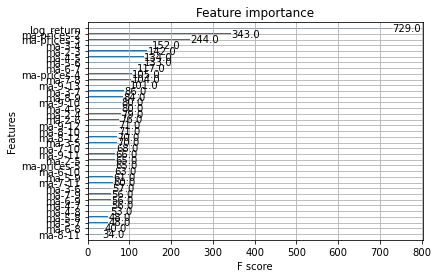

In [8]:
ticker = 'TSLA'
splits = 5

xgb_model = train_one_ticker(ticker)

df = load_data(ticker, tf='D',  label='prices').fillna(0).squeeze()
pf, predicts = show_top_bottom(df, model=xgb_model)
df.insert(1, f'predicts',predicts)
df.predicts = df.predicts.shift(1).fillna(df.close)

xgb.plot_importance(xgb_model)
# xgb.to_graphviz(xgb_model, num_trees=xgb_model.best_iteration)


In [91]:
help(talib.OBV)

Help on function OBV in module talib._ta_lib:

OBV(...)
    OBV(real, volume)
    
    On Balance Volume (Volume Indicators)
    
    Inputs:
        real: (any ndarray)
        prices: ['volume']
    Outputs:
        real



In [11]:
import talib
from datetime import datetime, timedelta
import yfinance as yf
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
ticker = 'wsm'
tf = '1d'
period = '5y'
trading_days = 5
ticker = ticker.upper()
# df, trendy = process_data(watch, ticker, tf, duration=period)

# end_date = datetime.now()
# start_date = end_date - timedelta(days=trading_days)

start_date = datetime(2022, 3, 1) # Adjust as needed
end_date = datetime(2023, 3, 16)   # Adjust as needed

df = yf.download(ticker, 
                  start = start_date, 
                  end = end_date, 
                  interval=tf)
# print(df.columns)
df.columns = df.columns.str.lower()
# print(df[['open','high','low','close']])
# hammer pattern
# res = talib.CDLHAMMER(df['open'], df['high'], df['low'], df['close'])
# res_ =talib.CDLHANGINGMAN(df['open'], df['high'], df['low'], df['close'])

#
#3candle
#
# res = talib.CDL3INSIDE(df['open'], df['high'], df['low'], df['close'])
res = talib.CDL3OUTSIDE(df['open'], df['high'], df['low'], df['close'])

#
# obv
#
obv = talib.OBV(df['close'], df['volume'])
obv_ema = talib.EMA(obv, timeperiod=3)
# print(obv_ema)
entries =  obv > obv_ema
exits = obv < obv_ema

# print(df[res==100].open)
pf = vbt.Portfolio.from_signals(df['open'], entries, exits)
# trend = np.where(exits , -1, 0)
# trend = np.where( entries, 1, trend)   
# pf = df.ta.tsignals(entries, asbool=False, append=True)
print(pf.stats())
fig = pf.plot()
fig.layout.xaxis.type = 'category'
fig.layout.xaxis2.type = 'category'
fig.layout.xaxis3.type = 'category'
fig.show()

#Create and plot the graph
# plt.figure(figsize=(12.2,4.5)) #width = 12.2in, height = 4.5
# # plt.plot( df['close'],  label='Close')#plt.plot( X-Axis , Y-Axis, line_width, alpha_for_blending,  label)
# plt.plot( obv,  label='OBV', color= 'orange')
# plt.plot( obv_ema,  label='OBV_EMA', color= 'purple')
# plt.xticks(rotation=45) 
# plt.title('OBV/OBV_EMA')
# plt.xlabel('Date',fontsize=18)
# plt.ylabel('Price USD ($)',fontsize=18)
# plt.show()

[*********************100%***********************]  1 of 1 completed
Start                         2022-03-01 00:00:00-05:00
End                           2023-03-15 00:00:00-04:00
Period                                              262
Start Value                                       100.0
End Value                                    605.566958
                                        ...            
Avg Losing Trade [%]                          -2.763463
Avg Winning Trade Duration                     2.644444
Avg Losing Trade Duration                      1.153846
Profit Factor                                  5.294545
Expectancy                                     8.716672
Length: 24, dtype: object


/home/steven/anaconda3/lib/python3.9/site-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'sharpe_ratio' requires frequency to be set

/home/steven/anaconda3/lib/python3.9/site-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'calmar_ratio' requires frequency to be set

/home/steven/anaconda3/lib/python3.9/site-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'omega_ratio' requires frequency to be set

/home/steven/anaconda3/lib/python3.9/site-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'sortino_ratio' requires frequency to be set



In [88]:
# print(df)
fig = pf.plot(subplots = [ 
    ('Predicts', dict(
       title='Predicts',
       xaxis_kwargs=dict(type='category'),
       yaxis_kwargs=dict(title='Predicts'))),
#     ('MA', dict(
#        title='Moving Average',
#        xaxis_kwargs=dict(type='category'),
#        yaxis_kwargs=dict(title='Moving Average'))),
#     ('orders', dict(
#        title='Orders',
#        xaxis_kwargs=dict(type='category'),
#        yaxis_kwargs=dict(title='data'))),
    'orders',
    'cum_returns'
])
# print(df[['close','predicts']].iloc[:20])
scatter = vbt.plotting.Scatter(
#     data = df.predicts.iloc[:20],
    data = df.close,
    x_labels = df.index,
    trace_names = ["Predicts"],
    trace_kwargs = dict(line=dict(color='red')),
    add_trace_kwargs = dict(row=1, col=1),
    fig = fig
)
fig.show()

In [250]:
model_name = "test_model"
save_model(xgb_model, model_name)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

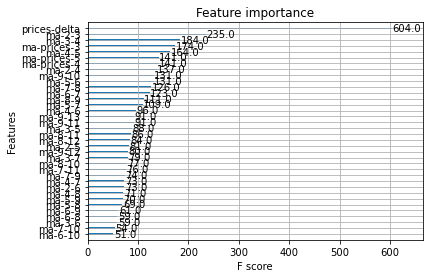

In [251]:
model_loaded = load_model(model_name)
ticker = 'COST'
df = load_data(ticker, tf='D',  label='prices').fillna(0).squeeze()
# print(df)
# pf, predicts = show_top_bottom(df, model=xgb_model)
df.drop('y', axis=1, inplace=True)
df.drop('close', axis=1, inplace=True)
df.reset_index(drop=True, inplace=True)
trend_ai = model_loaded.predict(df)
df.insert(1, f'predicts',trend_ai)
xgb.plot_importance(model_loaded)

In [50]:
#
# PRODUCTION SECTION
#
period = '1y'
ticker = 'tsla'
ticker = ticker.upper()
asset, trendy = process_data(watch, ticker, tf, duration=period)
# print(asset.get('close'))
asset, new_data  = trade_asset(asset, trendy)

TA Columns Added:
Current Trade:
Price Entry | Last:	192.2200 | 191.8100
Unrealized PnL | %:	-0.4100 | -0.2133%

Trades Total | Round Trip:	9 | 4
Trade Coverage: 32.54%


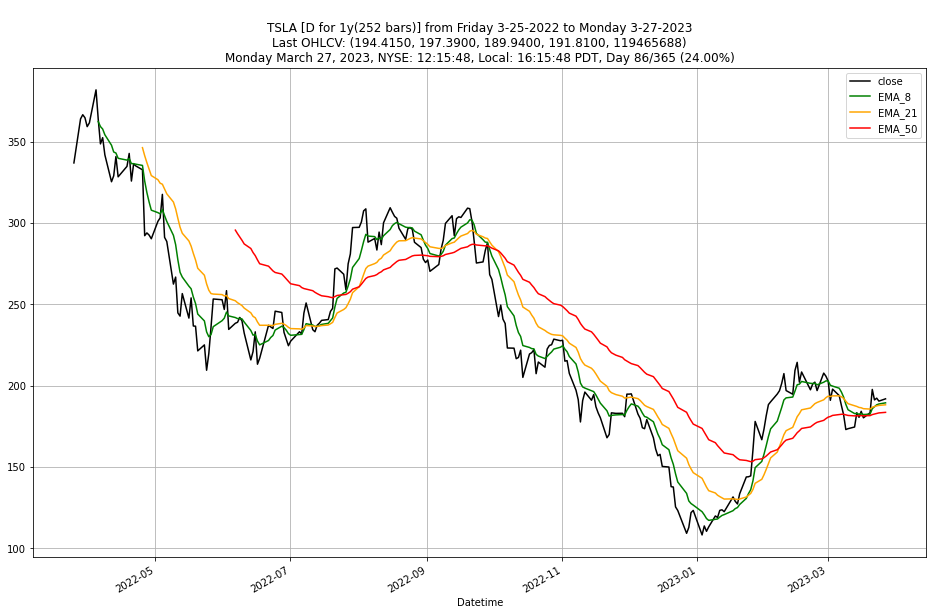

In [51]:
display_asset(asset)

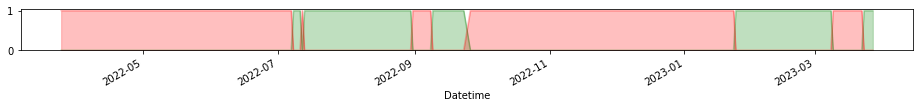

In [52]:
display_trend_1(trendy)

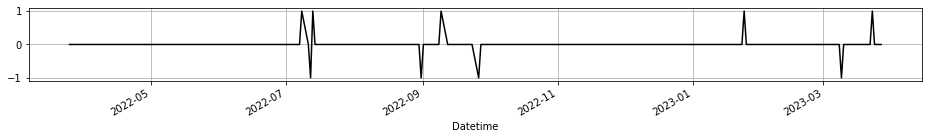

In [53]:
display_trend_2(trendy)

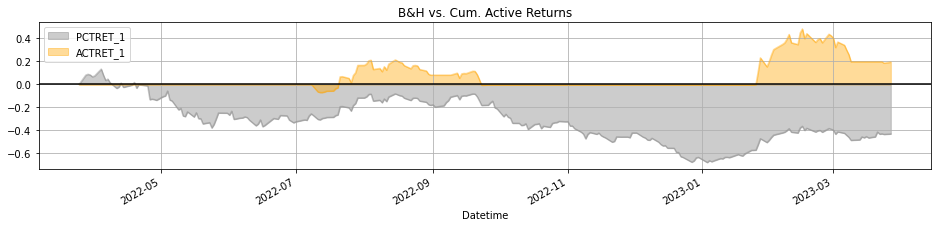

In [54]:
display_return_2(asset, trendy)

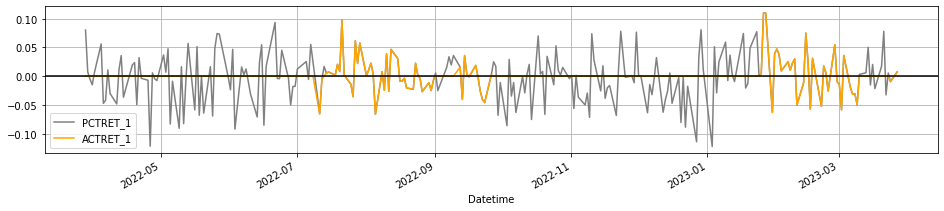

In [55]:
display_return_1(asset, trendy)

## Data Collection

In [21]:
watch = Watchlist(tickers, tf=tf, ds_name="yahoo", timed=True)
# watch.strategy = ta.CommonStrategy # If you have a Custom Strategy, you can use it here.
momo_bands_sma_ta = [
    {"kind":"sma", "length": 50},
    {"kind":"sma", "length": 200},
    {"kind":"bbands", "length": 20, "ddof": 0},
    {"kind":"macd"},
    {"kind":"rsi"},
    {"kind":"ppo"},
    {"kind":"log_return", "cumulative": True},
    {"kind":"sma", "close": "CUMLOGRET_1", "length": 5, "suffix": "CUMLOGRET"},
]
momo_bands_sma_strategy = ta.Strategy(
    "Momo, Bands and SMAs and Cumulative Log Returns", # name
    momo_bands_sma_ta, # ta
    "MACD and RSI Momo with BBANDS and SMAs 50 & 200 and Cumulative Log Returns" # description
)
watch.strategy = momo_bands_sma_strategy
watch.load(tickers, analyze=True, verbose=False)

[!] Loading All: TSLA, GOOG, MRNA, GUSH, EQT, SE, COIN, ENPH, AAPL, SHOP, NVDA, BX, BLK, LRCX, TSM
/home/steven/av_data/TSLA_D.csv
[i] Loaded TSLA[D]: TSLA_D.csv
[i] Runtime: 83.2435 ms (0.0832 s)
/home/steven/av_data/GOOG_D.csv
[i] Loaded GOOG[D]: GOOG_D.csv
[i] Runtime: 82.6790 ms (0.0827 s)
/home/steven/av_data/MRNA_D.csv
[i] Loaded MRNA[D]: MRNA_D.csv
[i] Runtime: 79.3724 ms (0.0794 s)
/home/steven/av_data/GUSH_D.csv
[i] Loaded GUSH[D]: GUSH_D.csv
[i] Runtime: 81.4274 ms (0.0814 s)
/home/steven/av_data/EQT_D.csv
[i] Loaded EQT[D]: EQT_D.csv
[i] Runtime: 94.0027 ms (0.0940 s)
/home/steven/av_data/SE_D.csv
[i] Loaded SE[D]: SE_D.csv
[i] Runtime: 80.1610 ms (0.0802 s)
/home/steven/av_data/COIN_D.csv
[i] Loaded COIN[D]: COIN_D.csv
[i] Runtime: 82.9541 ms (0.0830 s)
/home/steven/av_data/ENPH_D.csv
[i] Loaded ENPH[D]: ENPH_D.csv
[i] Runtime: 85.0754 ms (0.0851 s)
/home/steven/av_data/AAPL_D.csv
[i] Loaded AAPL[D]: AAPL_D.csv
[i] Runtime: 91.4602 ms (0.0915 s)
/home/steven/av_data/SHOP_D.

# Asset Selection

In [11]:
ticker = tickers[0] # change tickers by changing the index
print(f"{ticker} {watch.data[ticker].shape}\nColumns: {', '.join(list(watch.data[ticker].columns))}")

TSLA (3193, 24)
Columns: Open, High, Low, Close, Volume, Dividends, Stock Splits, Datetime, SMA_50, SMA_200, BBL_20_2.0, BBM_20_2.0, BBU_20_2.0, BBB_20_2.0, BBP_20_2.0, MACD_12_26_9, MACDh_12_26_9, MACDs_12_26_9, RSI_14, PPO_12_26_9, PPOh_12_26_9, PPOs_12_26_9, CUMLOGRET_1, SMA_5_CUMLOGRET


### Trim it

In [12]:
duration = "1y"
asset = watch.data[ticker]
recent = recent_bars(asset, duration)
asset.columns = asset.columns.str.lower()
asset.drop(columns=["dividends", "split"], errors="ignore", inplace=True)
asset = asset.copy().tail(recent)
asset

,open,high,...,cumlogret_1,sma_5_cumlogret
Datetime,,,,,
2022-03-04 05:00:00+00:00,283.033325,285.216675,...,5.167342,5.190919
2022-03-07 05:00:00+00:00,285.433319,288.713318,...,5.126298,5.175185
2022-03-08 05:00:00+00:00,265.176666,283.329987,...,5.150634,5.165716
2022-03-09 05:00:00+00:00,279.826660,286.853333,...,5.191712,5.160904
2022-03-10 05:00:00+00:00,283.816681,284.816681,...,5.167354,5.160668
...,...,...,...,...,...
2023-02-28 05:00:00+00:00,210.589996,211.229996,...,4.861057,4.845798
2023-03-01 05:00:00+00:00,206.210007,207.199997,...,4.846662,4.847691
2023-03-02 05:00:00+00:00,186.740005,193.750000,...,4.786340,4.836318


# Trend Creation
A **Trend** is the result of some calculation or condition of one or more indicators. For simplicity, a _Trend_ is either ```True``` or ```1``` and _No Trend_ is ```False``` or ```0```. Using the **Hello World** of Trends, the **Golden/Death Cross**, it's Trend is _Long_ when ```long = ma(close, 50) > ma(close, 200) ``` and _Short_ when ```short = ma(close, 50) < ma(close, 200) ```. 

In [13]:
# Example Long Trends
# long = ta.sma(asset.close, 50) > ta.sma(asset.close, 200) # SMA(50) > SMA(200) "Golden/Death Cross"
# long = ta.sma(asset.close, 10) > ta.sma(asset.close, 20) # SMA(10) > SMA(20)
# long = ta.ema(asset.close, 8) > ta.ema(asset.close, 21) # EMA(8) > EMA(21)
# long = ta.increasing(ta.ema(asset.close, 50))
long = ta.macd(asset.close).iloc[:,1] > 0 # MACD Histogram is positive
# long = ta.amat(asset.close, 50, 200).AMATe_LR_2  # Long Run of AMAT(50, 200) with lookback of 2 bars

# long &= ta.increasing(ta.ema(asset.close, 50), 2) # Uncomment for further long restrictions, in this case when EMA(50) is increasing/sloping upwards
# long = 1 - long # uncomment to create a short signal of the trend

###############################################################################################
# PPO long
# AND [Daily SMA(20,Daily Volume) > 40000] 
# AND [Daily SMA(60,Daily Close) > 20] 

# AND [Daily Close > Daily SMA(200,Daily Close)] 
# AND [Yesterday's Daily PPO Line(12,26,9,Daily Close) < Daily PPO Signal(12,26,9,Daily Close)] 
# AND [Daily PPO Line(12,26,9,Daily Close) > Daily PPO Signal(12,26,9,Daily Close)] 
# AND [Daily PPO Line(12,26,9,Daily Close) < 0]
#
###############################################################################################
asset.ta.ema(length=8, sma=False, append=True)
asset.ta.ema(length=21, sma=False, append=True)
asset.ta.ema(length=50, sma=False, append=True)
asset.ta.percent_return(append=True)
print("TA Columns Added:")
asset[asset.columns[5:]].tail()

TA Columns Added:


,stock splits,datetime,...,EMA_50,PCTRET_1
Datetime,,,,,
2023-02-28 05:00:00+00:00,0.0,2023-02-28 05:00:00+00:00,...,179.623102,-0.009247
2023-03-01 05:00:00+00:00,0.0,2023-03-01 05:00:00+00:00,...,180.530823,-0.014292
2023-03-02 05:00:00+00:00,0.0,2023-03-02 05:00:00+00:00,...,180.937458,-0.058539
2023-03-03 05:00:00+00:00,0.0,2023-03-03 05:00:00+00:00,...,181.598341,0.036092
2023-03-06 05:00:00+00:00,0.0,2023-03-06 05:00:00+00:00,...,182.077230,-0.020122


### **Trend Signals** 
Given a _Trend_, **Trend Signals** returns the _Trend_, _Trades_, _Entries_ and _Exits_ as boolean integers. When ```asbool=True```, it returns _Trends_, _Entries_ and _Exits_ as boolean values which is helpful when combined with the [**vectorbt**](https://github.com/polakowo/vectorbt) backtesting package.

In [14]:
trendy = asset.ta.tsignals(long, asbool=False, append=True)
trendy.tail()

,TS_Trends,TS_Trades,TS_Entries,TS_Exits
Datetime,,,,
2023-02-28 05:00:00+00:00,0,0,0,0
2023-03-01 05:00:00+00:00,0,0,0,0
2023-03-02 05:00:00+00:00,0,0,0,0
2023-03-03 05:00:00+00:00,0,0,0,0
2023-03-06 05:00:00+00:00,0,0,0,0


### Trend Entries & Exits & Trade Table
This is a simple way to reduce the Asset DataFrame to a Trade Table with Dates, Signals, and Entries and Exits. Gives you an idea what to expect before running through a backtester such as [**vectorbt**](https://github.com/polakowo/vectorbt).

In [15]:
entries = trendy.TS_Entries * asset.close
entries = entries[~np.isclose(entries, 0)]
entries.dropna(inplace=True)
entries.name = "Entry"

exits = trendy.TS_Exits * asset.close
exits = exits[~np.isclose(exits, 0)]
exits.dropna(inplace=True)
exits.name = "Exit"

total_trades = trendy.TS_Trades.abs().sum()
rt_trades = int(trendy.TS_Trades.abs().sum() // 2)

all_trades = trendy.TS_Trades.copy().fillna(0)
all_trades = all_trades[all_trades != 0]

trades = pd.DataFrame({
    "Signal": all_trades,
    entries.name: entries,
    exits.name: exits
})

# Show some stats if there is an active trade (when there is an odd number of round trip trades)
if total_trades % 2 != 0:
    unrealized_pnl = asset.close.iloc[-1] - entries.iloc[-1]
    unrealized_pnl_pct_change = 100 * ((asset.close.iloc[-1] / entries.iloc[-1]) - 1)
    print("Current Trade:")
    print(f"Price Entry | Last:\t{entries.iloc[-1]:.4f} | {asset.close.iloc[-1]:.4f}")
    print(f"Unrealized PnL | %:\t{unrealized_pnl:.4f} | {unrealized_pnl_pct_change:.4f}%")
print(f"\nTrades Total | Round Trip:\t{total_trades} | {rt_trades}")
print(f"Trade Coverage: {100 * asset.TS_Trends.sum() / asset.shape[0]:.2f}%")

# trades.tail(1)


Trades Total | Round Trip:	14 | 7
Trade Coverage: 44.84%


,Signal,Entry,Exit
Datetime,,,
2023-02-22 05:00:00+00:00,-1,NaN,200.860001


# Visualization

### Chart Display Strings

In [16]:
extime = ta.get_time(to_string=True)
first_date, last_date = asset.index[0], asset.index[-1]
f_date = f"{first_date.day_name()} {first_date.month}-{first_date.day}-{first_date.year}"
l_date = f"{last_date.day_name()} {last_date.month}-{last_date.day}-{last_date.year}"
last_ohlcv = f"Last OHLCV: ({asset.iloc[-1].open:.4f}, {asset.iloc[-1].high:.4f}, {asset.iloc[-1].low:.4f}, {asset.iloc[-1].close:.4f}, {int(asset.iloc[-1].volume)})"
ptitle = f"\n{ticker} [{tf} for {duration}({recent} bars)] from {f_date} to {l_date}\n{last_ohlcv}\n{extime}"

### Trade Chart

<AxesSubplot:title={'center':'\nTSLA [D for 1y(252 bars)] from Friday 3-4-2022 to Monday 3-6-2023\nLast OHLCV: (198.5400, 198.5680, 192.3100, 193.8100, 127504923)\nTuesday March 7, 2023, NYSE: 3:55:17, Local: 7:55:17 PST, Day 66/365 (18.00%)'}, xlabel='Datetime'>

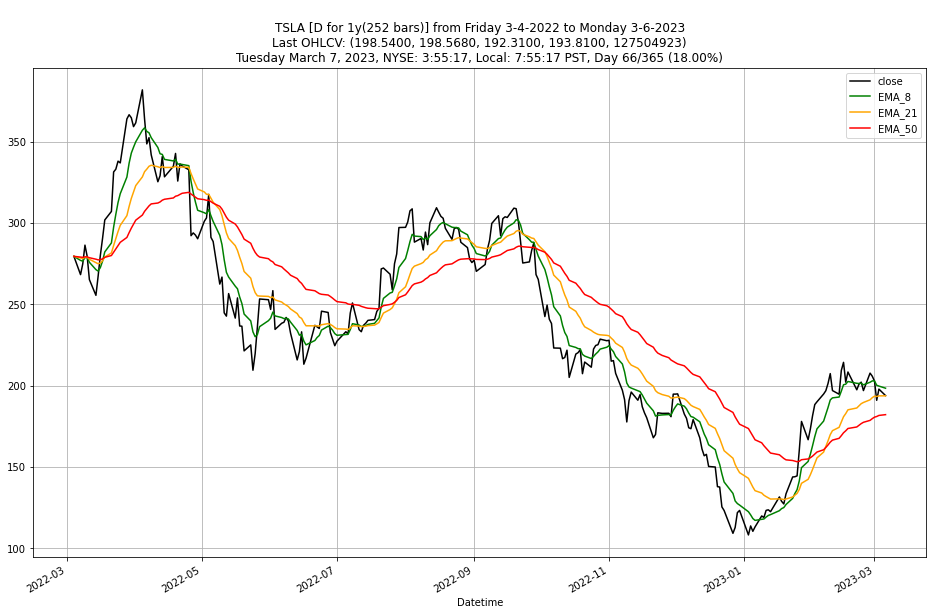

In [17]:
# chart = asset["close"] #asset[["close", "SMA_10", "SMA_20", "SMA_50", "SMA_200"]]
# chart = asset[["close", "SMA_10", "SMA_20"]]
chart = asset[["close", "EMA_8", "EMA_21", "EMA_50"]]
chart.plot(figsize=(16, 10), color=colors("BkGrOrRd"), title=ptitle, grid=True)

### Long and Short Trends
**Trends** are either a _Trend_ (```1```) or _No Trend_ (```0```) depending on the **Trend** passed into ***Trend Signals**

<AxesSubplot:xlabel='Datetime'>

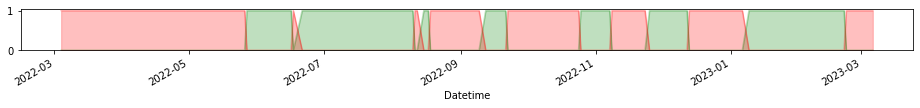

In [18]:
long_trend = trendy.TS_Trends
short_trend = 1 - long_trend

long_trend.plot(figsize=(16, 0.85), kind="area", stacked=True, color=colors()[0], alpha=0.25) # Green Area
short_trend.plot(figsize=(16, 0.85), kind="area", stacked=True, color=colors()[1], alpha=0.25) # Red Area

### Trades or Trade Signals
The **Trades** are either _Enter_ (```1```) or _Exit_ (```-1```) or _No Position/Action_ (```0```). These are based on the **Trend** passed into **Trend Signals** whether they are _Long_ or _Short_ Trends.

<AxesSubplot:xlabel='Datetime'>

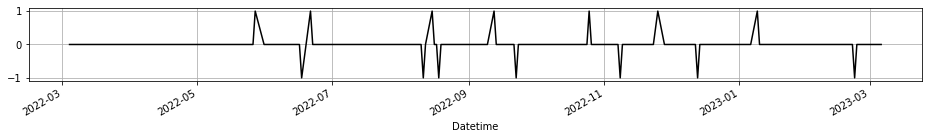

In [19]:
trendy.TS_Trades.plot(figsize=(16, 1.5), color=colors("BkBl")[0], grid=True)

### Active Returns
**Active Returns** are returns made during the course of the _Trend_. They are simply the product of the returns and the _Trend_

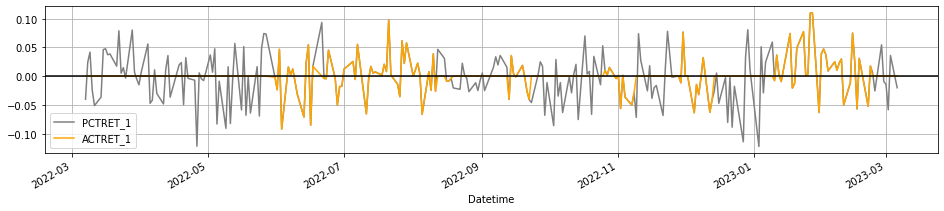

In [20]:
asset["ACTRET_1"] = trendy.TS_Trends.shift(1) * asset.PCTRET_1
asset[["PCTRET_1", "ACTRET_1"]].plot(figsize=(16, 3), color=colors("GyOr"), alpha=1, grid=True).axhline(0, color="black")

### Buy and Hold Returns (*PCTRET_1*) vs. Cum. Active Returns (*ACTRET_1*)

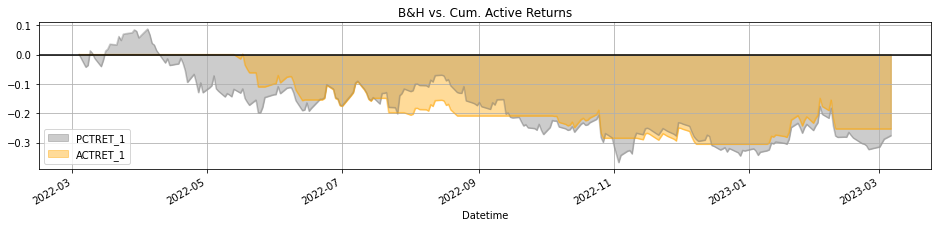

In [66]:
((asset[["PCTRET_1", "ACTRET_1"]] + 1).cumprod() - 1).plot(figsize=(16, 3), kind="area", stacked=False, color=colors("GyOr"), title="B&H vs. Cum. Active Returns", alpha=.4, grid=True).axhline(0, color="black")

# Disclaimer
* All investments involve risk, and the past performance of a security, industry, sector, market, financial product, trading strategy, or individual’s trading does not guarantee future results or returns. Investors are fully responsible for any investment decisions they make. Such decisions should be based solely on an evaluation of their financial circumstances, investment objectives, risk tolerance, and liquidity needs.

* Any opinions, news, research, analyses, prices, or other information offered is provided as general market commentary, and does not constitute investment advice. I will not accept liability for any loss or damage, including without limitation any loss of profit, which may arise directly or indirectly from use of or reliance on such information.